## Introduction 
The focus of this investigation is to determine the main attributes of a loan data that influence the returns that lenders get on their investment (monies lent to borrowers). Three main attributes - borrower's annual percentage rate, loan ratings and the estimated loss of the loans will be investigated. 



A loan data containing 113,937 rows was used for the investigation. The initial data contains 81 attributes. Only 23 of those attributes were needed for this analysis hence the rest were not dropped. Some of the important attributes in the data include the lenders' yield,loan ratings,  loan status, estimated loss, borrowers' annual percentage rate.

## Exploration of the Loan Data

In [261]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pickle
%matplotlib inline


In [262]:
# load in the dataset into a pandas dataframe, print statistics
loans = pd.read_csv('prosperLoanData.csv')


In [263]:
# high-level overview of data shape and composition
print(loans.shape)
print(loans.dtypes)

loans.head(5)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [264]:
loans.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### Comments
Some of the data variables would not be needed in the exploration process. In order to reduce wrangling efforts (given that there are 81 variables in the dataset), we copy those variables from the dataset.



In [265]:
# Copy the dataset with the necessary variables
needed_variables = ['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 
        'CreditScoreRangeUpper', 'StatedMonthlyIncome',  'CurrentDelinquencies', 
        'AmountDelinquent', 'DelinquenciesLast7Years','LoanOriginalAmount',
        'MonthlyLoanPayment', 'Investors','Occupation']


loans_copy =  loans.copy()

In [266]:
loans_copy

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,55:02.7,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,42:55.3,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,49:12.7,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,18:26.6,NaN,60,Completed,8/13/2013 0:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [267]:
# descriptive statistics for numeric variables
loans_copy[needed_variables].describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,StatedMonthlyIncome,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,LoanOriginalAmount,MonthlyLoanPayment,Investors
count,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113346.000000,113346.000000,1.139370e+05,113240.000000,106315.000000,112947.000000,113937.00000,113937.000000,113937.000000
mean,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,685.567731,704.567731,5.608026e+03,0.592052,984.507059,4.154984,8337.01385,272.475783,80.475228
std,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,66.458275,66.458275,7.478497e+03,1.978707,7158.270157,10.160216,6245.80058,192.697812,103.239020
min,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,19.000000,0.000000e+00,0.000000,0.000000,0.000000,1000.00000,0.000000,1.000000
25%,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,660.000000,679.000000,3.200333e+03,0.000000,0.000000,0.000000,4000.00000,131.620000,2.000000
50%,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,680.000000,699.000000,4.666667e+03,0.000000,0.000000,0.000000,6500.00000,217.740000,44.000000
75%,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,720.000000,739.000000,6.825000e+03,0.000000,0.000000,3.000000,12000.00000,371.580000,115.000000
max,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,880.000000,899.000000,1.750003e+06,83.000000,463881.000000,99.000000,35000.00000,2251.510000,1189.000000


#### Handle Missing Data 

In [268]:
# Verify the number of missing values in the data
loans_copy[needed_variables].isnull().sum()

Term                           0
LoanStatus                     0
BorrowerAPR                   25
BorrowerRate                   0
LenderYield                    0
EstimatedEffectiveYield    29084
EstimatedLoss              29084
EstimatedReturn            29084
ProsperRating (numeric)    29084
ProsperRating (Alpha)      29084
ProsperScore               29084
EmploymentStatus            2255
IsBorrowerHomeowner            0
CreditScoreRangeLower        591
CreditScoreRangeUpper        591
StatedMonthlyIncome            0
CurrentDelinquencies         697
AmountDelinquent            7622
DelinquenciesLast7Years      990
LoanOriginalAmount             0
MonthlyLoanPayment             0
Investors                      0
Occupation                  3588
dtype: int64

In [269]:
# Fill the missing values with the median. Median is chosen to reduce the effect of outliers
columns = ['BorrowerAPR','EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
          'ProsperScore', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentDelinquencies', 'CurrentDelinquencies',
           'AmountDelinquent', 'DelinquenciesLast7Years']
for col in columns:
    col_median = round(loans_copy[col].median(), 5)
    loans_copy[col].fillna(col_median, inplace=True)


0.20976
0.1615
0.0724
0.0917
4.0
6.0
680.0
699.0
0.0
0.0
0.0
0.0


In [301]:
# Re-check our missing values
loans_copy[needed_variables].isnull().sum()

Term                           0
LoanStatus                     0
BorrowerAPR                    0
BorrowerRate                   0
LenderYield                    0
EstimatedEffectiveYield        0
EstimatedLoss                  0
EstimatedReturn                0
ProsperRating (numeric)        0
ProsperRating (Alpha)      29084
ProsperScore                   0
EmploymentStatus               0
IsBorrowerHomeowner            0
CreditScoreRangeLower          0
CreditScoreRangeUpper          0
StatedMonthlyIncome            0
CurrentDelinquencies           0
AmountDelinquent               0
DelinquenciesLast7Years        0
LoanOriginalAmount             0
MonthlyLoanPayment             0
Investors                      0
Occupation                     0
dtype: int64

In [303]:
# Fill missing categorical values with the mode
mising_categorical_columns = ['EmploymentStatus', 'Occupation' ]
for col in mising_categorical_columns:
    col_mode = loans_copy[col].mode()[0]
    loans_copy[col].fillna(col_mode, inplace=True)

In [272]:
loans_copy[needed_variables].isnull().sum()

Term                           0
LoanStatus                     0
BorrowerAPR                    0
BorrowerRate                   0
LenderYield                    0
EstimatedEffectiveYield        0
EstimatedLoss                  0
EstimatedReturn                0
ProsperRating (numeric)        0
ProsperRating (Alpha)      29084
ProsperScore                   0
EmploymentStatus               0
IsBorrowerHomeowner            0
CreditScoreRangeLower          0
CreditScoreRangeUpper          0
StatedMonthlyIncome            0
CurrentDelinquencies           0
AmountDelinquent               0
DelinquenciesLast7Years        0
LoanOriginalAmount             0
MonthlyLoanPayment             0
Investors                      0
Occupation                     0
dtype: int64

In [273]:
# check for the datatypes of the variables
loans_copy[needed_variables].dtypes

Term                         int64
LoanStatus                  object
BorrowerAPR                float64
BorrowerRate               float64
LenderYield                float64
EstimatedEffectiveYield    float64
EstimatedLoss              float64
EstimatedReturn            float64
ProsperRating (numeric)    float64
ProsperRating (Alpha)       object
ProsperScore               float64
EmploymentStatus            object
IsBorrowerHomeowner           bool
CreditScoreRangeLower      float64
CreditScoreRangeUpper      float64
StatedMonthlyIncome        float64
CurrentDelinquencies       float64
AmountDelinquent           float64
DelinquenciesLast7Years    float64
LoanOriginalAmount           int64
MonthlyLoanPayment         float64
Investors                    int64
Occupation                  object
dtype: object

In [274]:
loans_copy['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [275]:
loans_copy['ProsperRating (numeric)'].value_counts()

4.0    47429
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRating (numeric), dtype: int64

In [276]:
# convert the prosper rating alpha into ordered categorical types
ordinal_var_dict = {'ProsperRating (Alpha)': ['HR', 'E','D','C','B','A','AA'],
                    'ProsperRating (numeric)': [1,2,3,4,5,6,7]
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans_copy[var] = loans_copy[var].astype(ordered_var)

In [277]:
# copy only the variables(columns) that are needed for the exploration
clean_loans = loans_copy[needed_variables].copy()
clean_loans

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),...,CreditScoreRangeLower,CreditScoreRangeUpper,StatedMonthlyIncome,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,LoanOriginalAmount,MonthlyLoanPayment,Investors,Occupation
0,36,Completed,0.16516,0.1580,0.1380,0.16150,0.0724,0.09170,4,NaN,...,640.0,659.0,3083.333333,2.0,472.0,4.0,9425,330.43,258,Other
1,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6,A,...,680.0,699.0,6125.000000,0.0,0.0,0.0,10000,318.93,1,Professional
2,36,Completed,0.28269,0.2750,0.2400,0.16150,0.0724,0.09170,4,NaN,...,480.0,499.0,2083.333333,1.0,0.0,0.0,3001,123.32,41,Other
3,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6,A,...,800.0,819.0,2875.000000,4.0,10056.0,14.0,10000,321.45,158,Skilled Labor
4,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3,D,...,680.0,699.0,9583.333333,0.0,0.0,0.0,15000,563.97,20,Executive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,36,Current,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4,C,...,700.0,719.0,4333.333333,0.0,0.0,7.0,10000,364.74,1,Food Service Management
113933,36,FinalPaymentInProgress,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6,A,...,700.0,719.0,8041.666667,1.0,5062.0,4.0,2000,65.57,22,Professional
113934,60,Current,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3,D,...,700.0,719.0,2875.000000,0.0,0.0,0.0,10000,273.35,119,Other
113935,60,Completed,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4,C,...,680.0,699.0,3875.000000,0.0,0.0,0.0,15000,449.55,274,Food Service


#### Save the dataset to be used in other notebook files

In [278]:
clean_loans.to_pickle('clean_loans.pickle')

### Main feature of interest in the dataset?

In this project, my focus will be on the lender yield. This represent the interest that lenders' receive from their investment. 


### Supporting Variables
The following variables will be explored for their predictive power of the lender's yield.
1. LoanOriginalAmount
2. StatedMonthlyIncome
3. Investors
4. BorrowerAPR
5. EStimatedLoss
6. EstimatedReturn
7. CreditScoreRangeLower
8. CreditScoreRangeUpper
9. Term
10. Occupation
11. ProsperRating (Alpha)
12. IsBorrowerHomeowner
13. MonthlyLoanPayment
14. DelinquenciesLast7Years




## Univariate Exploration

#### 1. Lenders' Yield on Loans
What is the distribution of the LenderYield? Which returns are more likely for the investors?

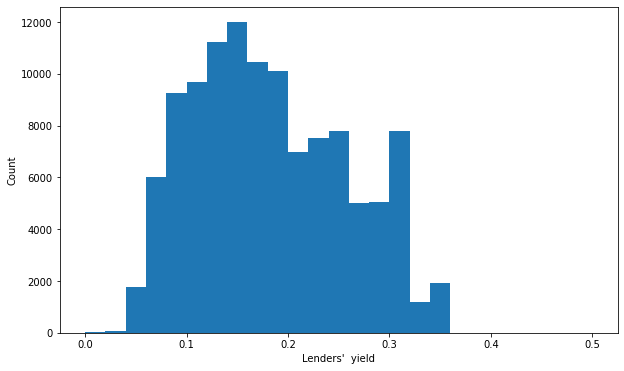

In [306]:
# Plot the lender's yield on a standard scale
plt.figure(figsize=[10,6])
binsize = 0.02
bins = np.arange(0, clean_loans['LenderYield'].max()+binsize, binsize)
plt.hist(data = loans, x = 'LenderYield', bins = bins )
plt.xlabel('Lenders\'  yield')
plt.ylabel('Count')
plt.show()

***Observation***
<br>
When plotted on an interval of 2%, we noticed one major return peaks in the frequency - 15% returns to the lenders. Generally, the distribution is normal. 

#### 2. Original Loan Amount requested by borrowers
Investigating the distribution of the original amount that was borrowed.   

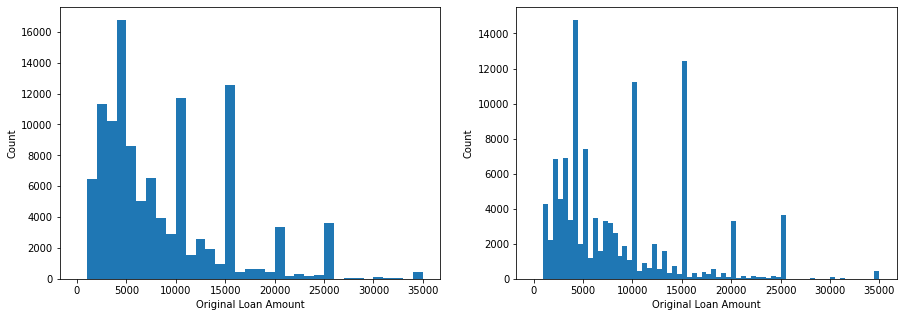

In [305]:
plt.figure(figsize=[15, 5])

# plotting original loan amount on a standard scale
plt.subplot(1,2,1)
binsize = 1000
bins = np.arange(0, clean_loans['LoanOriginalAmount'].max()+binsize, binsize)
plt.hist(data = clean_loans, x = 'LoanOriginalAmount', bins=bins )
plt.xlabel('Original Loan Amount')
plt.ylabel('Count')

# plotting original loan amount on smaller bin size

plt.subplot(1,2,2)
binsize = 500
bins = np.arange(0, clean_loans['LoanOriginalAmount'].max()+binsize, binsize)
plt.hist(data = clean_loans, x = 'LoanOriginalAmount', bins=bins )
plt.xlabel('Original Loan Amount')
plt.ylabel('Count')
plt.show()

***Observations***
<br>
The distribution shows peak number of loans originally borrowed at $\$$4,000.00, $\$$5,000.00,  $\$$10,000.00, $\$$15,000.00, $\$$20,000.00, $\$$20,000.00, and $\$$35,000.00. These may represent standard borrowed amounts in the banks.

#### 3. Number of investors that funded loan
Let's look at the number of investors that funded the loans.

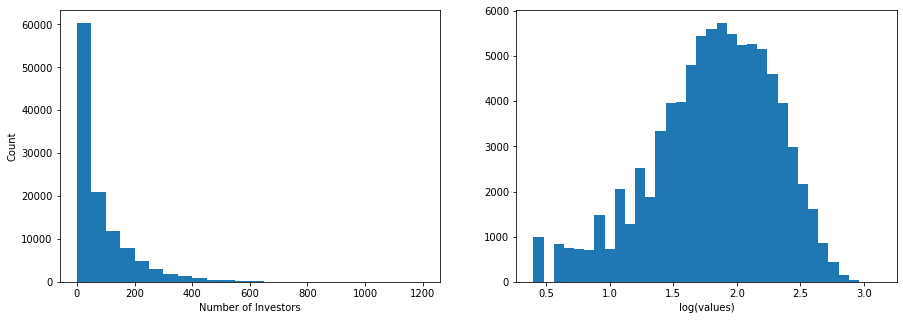

In [308]:
# plotting the number of investors on a standard scale.
plt.figure(figsize=[15, 5])
plt.subplot(1,2,1)
binsize = 50
bins = np.arange(0, clean_loans['Investors'].max()+binsize, binsize)
plt.hist(data = clean_loans, x = 'Investors', bins = bins)
plt.xlabel('Number of Investors')
plt.ylabel('Count')

# plotting the number of investors on the log-scale
plt.subplot(1,2,2)
bin_size = 0.08
log_data = np.log10(clean_loans['Investors'])
bin_edges = np.arange(0.4,log_data.max()+bin_size, bin_size)
plt.hist(log_data,  bins = bin_edges)
plt.xlabel('log(values)')
plt.show()

***Observation***
<br>
From the distribution, the number of investors in a loan are situated at the low number. When the distribution is transformed on the log-scaled, it further revealed the number of investors in the loans is peak around 100.


#### 4. Number of months of loans to mature
How long does it take loans to mature?

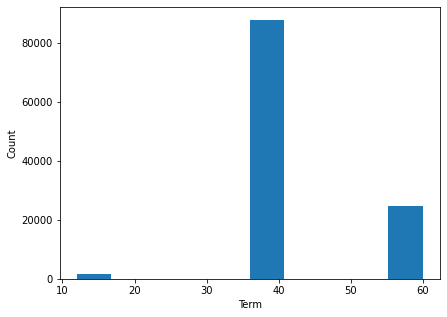

In [307]:
# plotting loan terms on a standard scale
plt.figure(figsize=[15, 5])

plt.subplot(1,2,1)
plt.hist(data = clean_loans, x = 'Term' )
plt.xlabel('Term')
plt.ylabel('Count')
plt.show()


***Observation***
<br>
For the loan period, the distribution shows most of the loans are around 36 months. This is quite explanative of mostly a 3-year period for granting loans.

#### 5. Borrower Annual Percentage Rate
One of the most important predictors that we expect is the borrowers' annual percentage rate.
We explore this variable to determine its distribution.

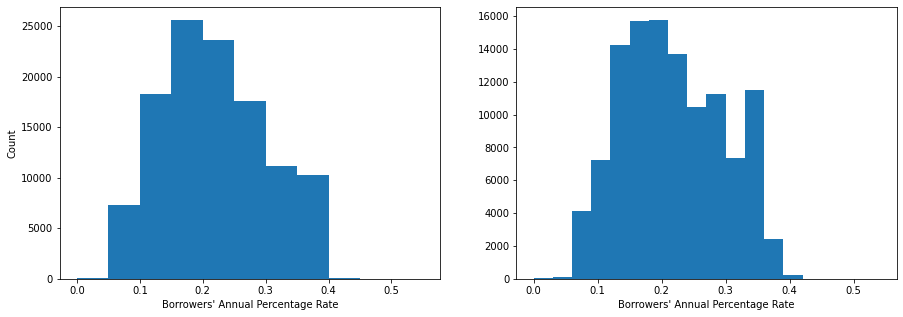

In [309]:
plt.figure(figsize=[15, 5])

plt.subplot(1,2,1)
# plotting borower APR on a standard scale

binsize = 0.05
bins = np.arange(0, clean_loans['BorrowerAPR'].max()+binsize, binsize)
plt.hist(data = clean_loans, x = 'BorrowerAPR', bins = bins )
plt.xlabel('Borrowers\' Annual Percentage Rate')
plt.ylabel('Count')

# plot this on a smaller bin sizes
plt.subplot(1,2,2)
binsize = 0.03
bins = np.arange(0, clean_loans['BorrowerAPR'].max()+binsize, binsize)
plt.hist(data = clean_loans, x = 'BorrowerAPR', bins = bins )

plt.xlabel('Borrowers\' Annual Percentage Rate')
plt.show()

***Observation***
<br>
The plot indicates an near normal distribution of borrowers' annual percentage cost. We notice high cost (38%) for a a huge number of borrowers. A nother notable cost for borrowers are 19% and 20%.

#### 6. Credit Score Ranges - Lower and Upper
These two variables are represent the score ratings by the consumers. We will explore how they affect the target variable(lenders' yield). For now we will look at what the distribution of these ratings look like.

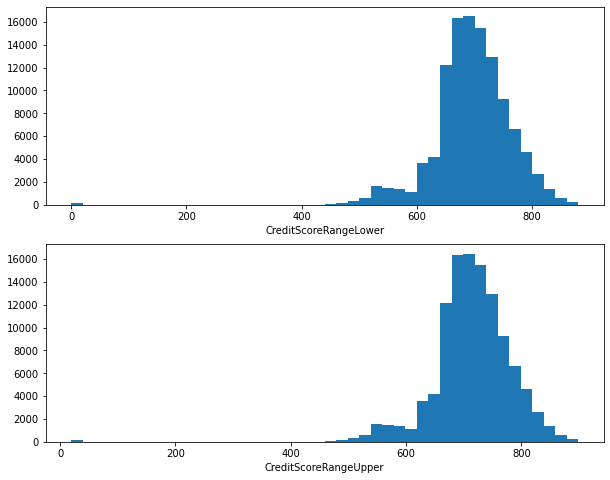

In [310]:
fig, ax = plt.subplots(nrows=2, figsize = [10,8])

variables = ['CreditScoreRangeLower', 'CreditScoreRangeUpper']
bin_size = 20
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(clean_loans[var]), max(loans[var])+bin_size, bin_size)
    ax[i].hist(data = loans, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))

plt.show()

***Observation***
<br>
Both distributions are are long-tailed to the left. They also obtained their peak frequency at the 700 score. 

#### 7. Loan status
At the end of the exploration, we will look at how the loan status and the lenders' yield relate. For now, we will observe the count of each status.

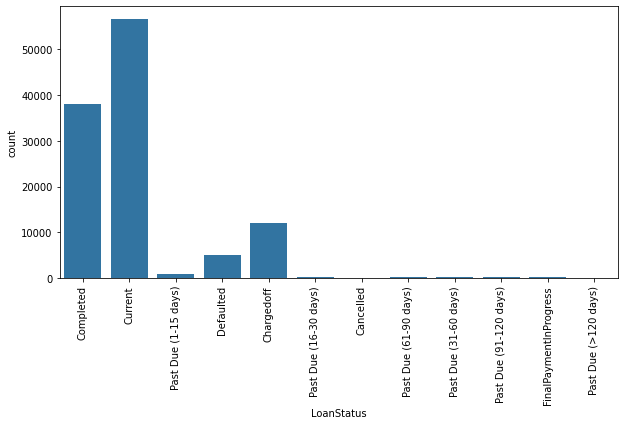

In [285]:
fig, ax = plt.subplots(figsize = [10,5])

default_color = sb.color_palette()[0]
sb.countplot(data = clean_loans, x = 'LoanStatus', color = default_color)
for tick in ax.get_xticklabels():
    tick.set_rotation(90);


***Observation***
<br>
As at the time of creating the listing, most of the loans are either current or completed with few chargeoff or defaulted.

#### 8. Stated Monthly Income

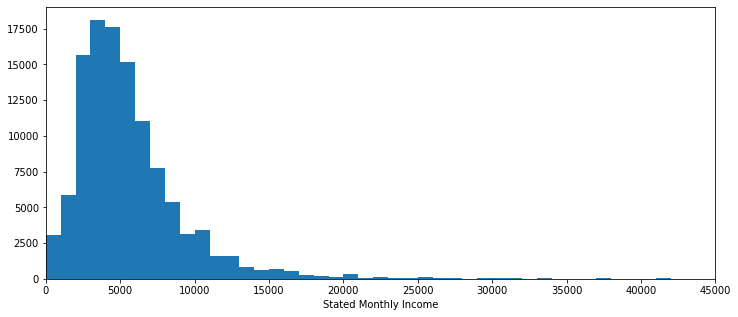

In [286]:
#plotting the stated monthly income on the standard scale
plt.figure(figsize=[12, 5])
binsize = 1000
bins = np.arange(loans['StatedMonthlyIncome'].min(), loans['StatedMonthlyIncome'].max()+binsize, binsize)
plt.hist(data = loans, x = 'StatedMonthlyIncome', bins = bins)
plt.xlim(0, 45000)
plt.xlabel('Stated Monthly Income')
plt.show();

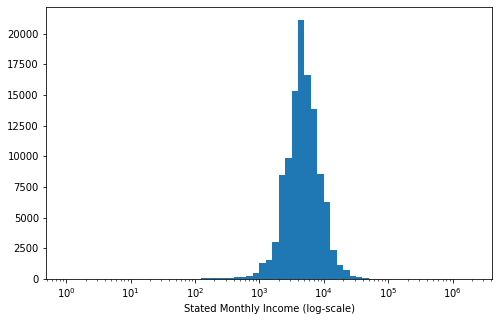

In [287]:
#plotting the stated monthly income on the log scale
log_binsize = 0.1
bins = 10 ** np.arange(0.0, np.log10(loans['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xlabel('Stated Monthly Income (log-scale)')
plt.show()

***Observation***
<br>
The standard scale shows a long-tailed distribution to the right. With the log-scaled, we observe a peak monthly income at 3,500 dollars.

#### 9. Estimated Loss
How is the distribution of the estimated loss? We will explore to find if there are some relevant patterns worth noting.

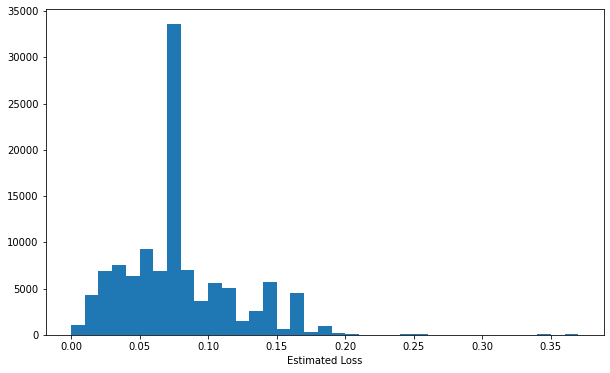

In [288]:
#plotting the estimated loss on a standard scale.
binsize = 0.01
bins = np.arange(0, clean_loans['EstimatedLoss'].max()+binsize, binsize)
plt.figure(figsize=[10,6])
plt.hist(data = clean_loans, x = 'EstimatedLoss', bins=bins)
plt.xlabel('Estimated Loss')
plt.show()

***Observation***
<br>
The most estimated loss for loans is 6%. Few losses are estimated at 25% and 35%.

#### 10. Prosper Rating
Here, we look out for the Prosper ratings and how they are distributed across our data. We will seek to answer the questions: Which rating is popular among the borrowers? 

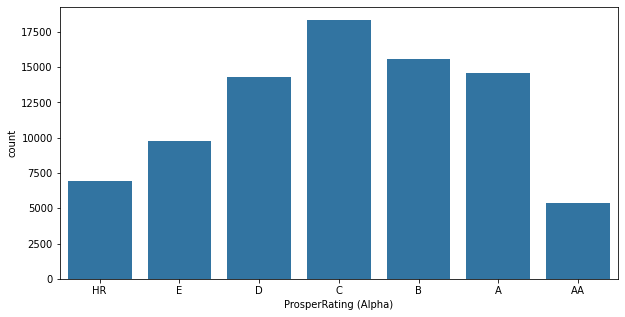

In [289]:
# we plot the the ratings as ordinal variable
fig, ax = plt.subplots(figsize = [10,5])
default_color = sb.color_palette()[0]
sb.countplot(data = clean_loans, x = 'ProsperRating (Alpha)', color = default_color);
plt.show()

***Observation***
<br>
From our chart, we observe that most of the loan applications are rated C. Most of the ratings are also at minimun C. 

#### 11. Employment Status
what is the employment status of most of the borrowers?

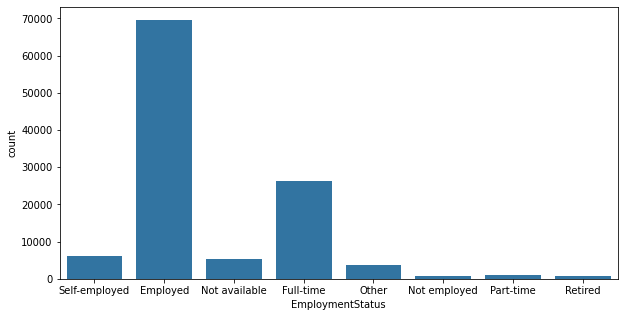

In [311]:
fig, ax = plt.subplots(figsize = [10,5])

default_color = sb.color_palette()[0]
sb.countplot(data = clean_loans, x = 'EmploymentStatus', color = default_color);


***Observation***
<br>
Most of the the borrowers are employed.

#### 12. If Borrower is a Homeowner
Do loans secured by homeowners have any impact on the lenders' yield? As we seek to answer this question later on, we want to explore if most of the borrowers own a house.

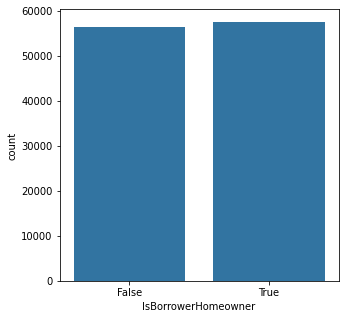

In [291]:
# plot to show the distribution of homeownership among the borrowers.

fig, ax = plt.subplots(figsize = [5,5])
default_color = sb.color_palette()[0]
sb.countplot(data = clean_loans, x = 'IsBorrowerHomeowner', color = default_color);


***Observation***
<br>
There is not much difference in the number of homeowners who have applied for the loan as compared those that are not homeowners. Only a few more own a house among the borrowers.

## Bivariate Exploration
Over here, we would take keen interest in the variables that have strong relationships, especially with our major variable (LenderYield).

In [292]:
correlation_variables = ['LenderYield', 'LoanOriginalAmount', 'Investors', 'Term', 'BorrowerAPR', 
                         'CreditScoreRangeLower', 'EstimatedLoss', 'StatedMonthlyIncome'
                        ]
categorical_variables = ['LoanStatus', 'ProsperRating (Alpha)', 'IsBorrowerHomeowner', 'EmploymentStatus' ]

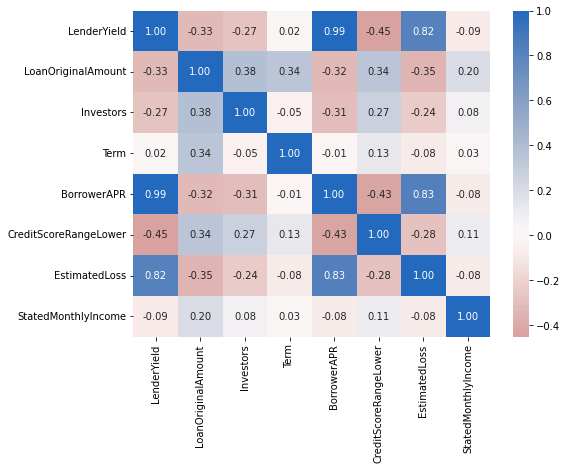

In [312]:
# we plot heatmap to see the correlation among the variables
plt.figure(figsize = [8, 6])
sb.heatmap(clean_loans[correlation_variables].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

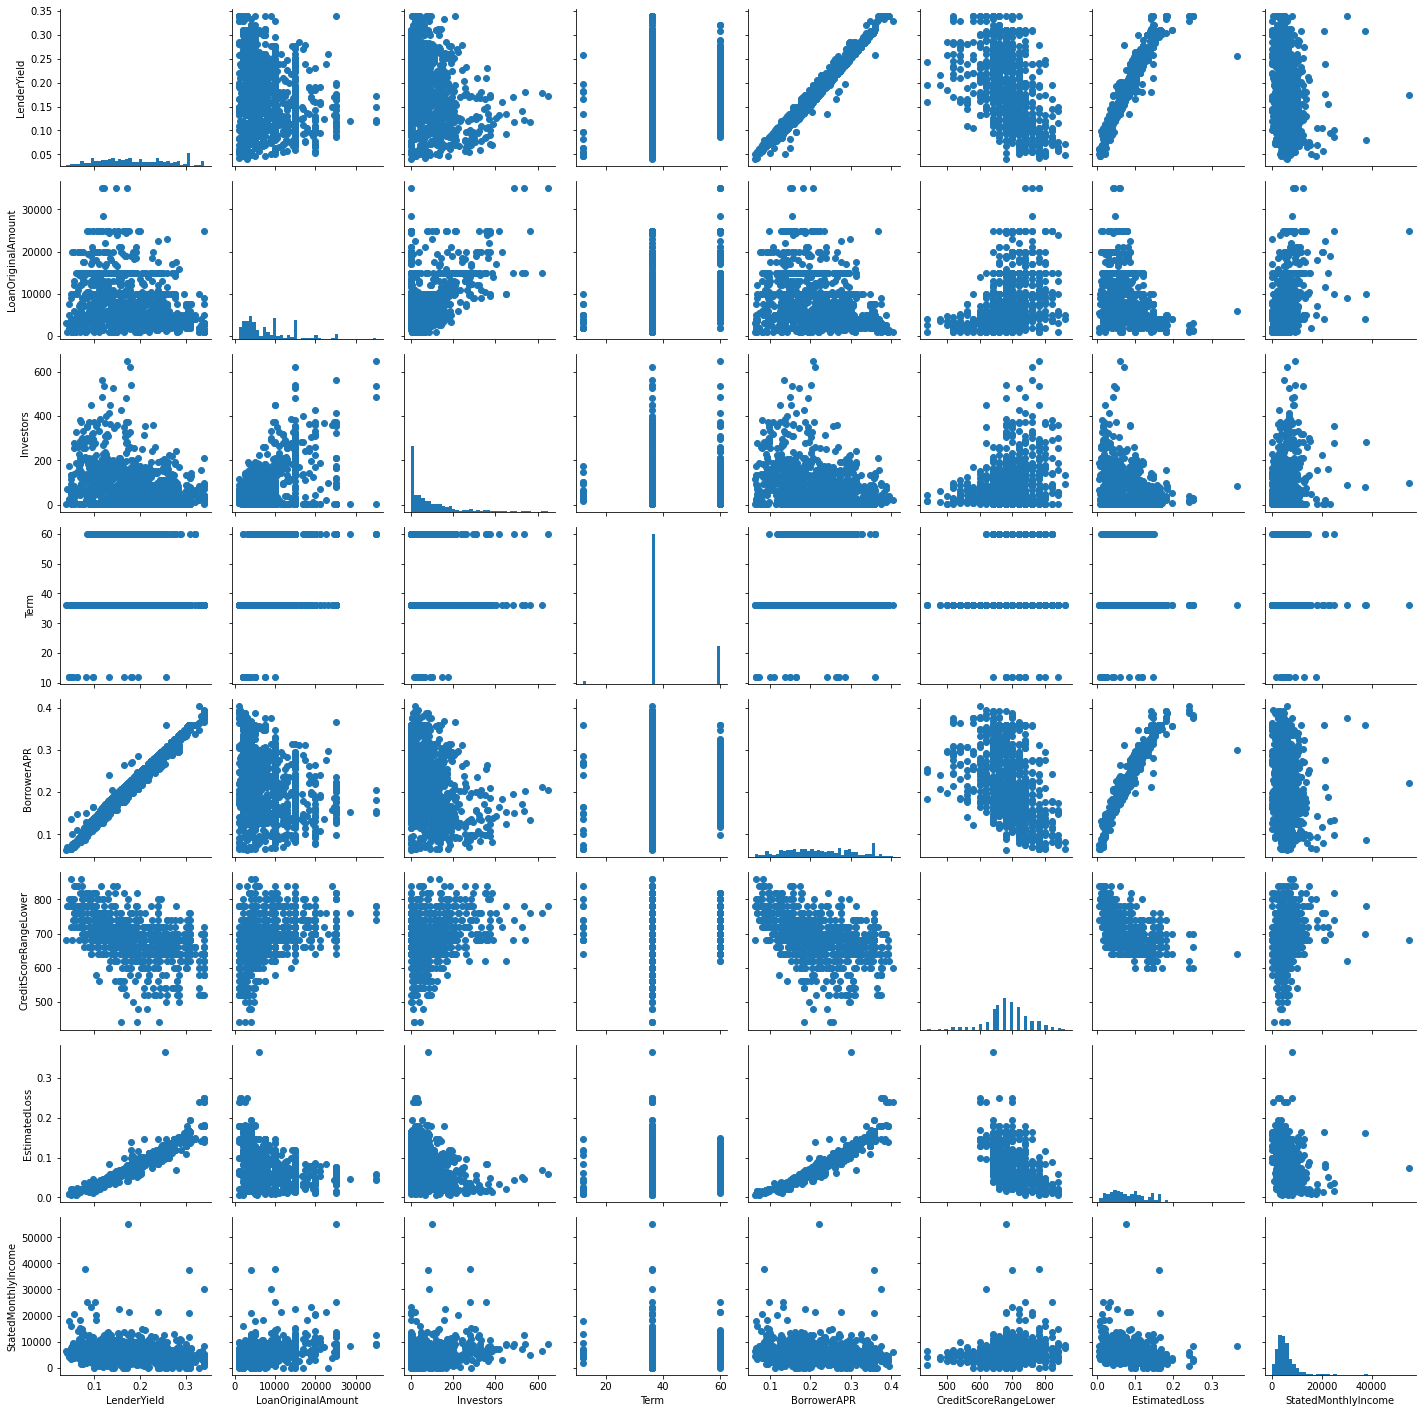

In [313]:
# We plot a sample of 1000 data points from to get a clear view of our correlation
samples = np.random.choice(clean_loans.shape[0], 1000, replace = False)
loans_samp = loans.loc[samples,:]

g = sb.PairGrid(data = loans_samp, vars = correlation_variables)
g = g.map_diag(plt.hist, bins = 40);
g.map_offdiag(plt.scatter);

***Observation***
<br>
There are three major variables with strong positive correlation: LenderYield and BorrowerAPR, LenderYield and EstimatedLoss, BorrowerAPR and EstimatedLoss.
These are much expected. When loss on the loans are high, it is assumed that such loans are quite risky and borrowers must pay more for the investors. This resulted in a strong positive relationship (0.83).
Also, high borrowing cost implies high yield for lenders. We see that LenderYield has a nearly perfect positive relationship (0.99) with the borrowers' annual percentage rate.

#### Let's dig more into the relationship between the LenderYield and the BorrowerAPR.

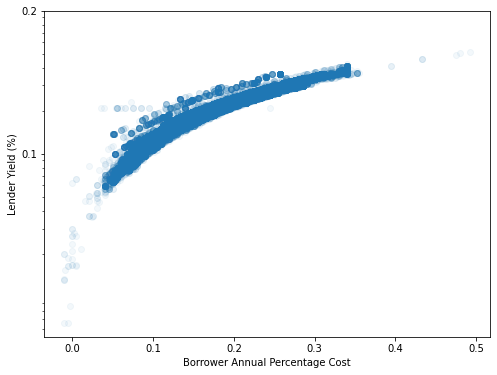

In [295]:
# We plot the LenderYield and the BorrowerAPR on a log scale
plt.figure(figsize = [8, 6])
plt.scatter(data = clean_loans, x = 'LenderYield', y = 'BorrowerAPR', alpha = 0.5/10)
plt.xlabel('Borrower Annual Percentage Cost')
plt.yscale('log')
plt.yticks([10e-2, 10e-1], [0.1, 0.2])
plt.ylabel('Lender Yield (%)')
plt.show()

#### Also dig more into the relationship between the LenderYield and the EstimatedLoss.

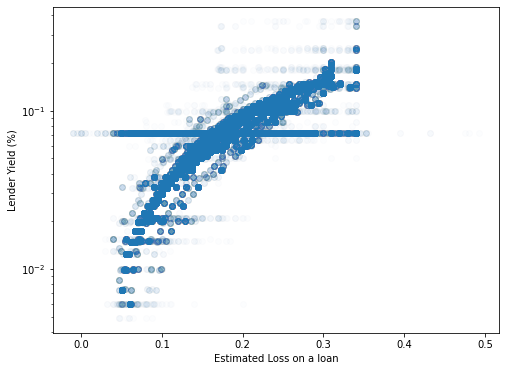

In [296]:
# We plot the LenderYield and the BorrowerAPR on a log scale
plt.figure(figsize = [8, 6])
plt.scatter(data = clean_loans, x = 'LenderYield', y = 'EstimatedLoss', alpha = 0.1/10)
plt.xlabel('Estimated Loss on a loan')
plt.yscale('log')
#plt.yticks([10e-2, 10e-1], [0.01, 0.1,0.2])
plt.ylabel('Lender Yield (%)')
plt.show()

***Observation***
<br>
As the major correlating factors,the chart appears to be concave indicating a possible maximum point in which the correlation decreases slightly.

## Multivariate Exploration


In the charts drawn below, we explore the categorical variables on the lenders' yield and borrowers' rate.


In [297]:
categorical_variables = ['LoanStatus', 'ProsperRating (Alpha)', 'IsBorrowerHomeowner', 'EmploymentStatus' ]

#### Lenders' Yield Vrs Borrowers' rate, Employment Status and Loan Ratings

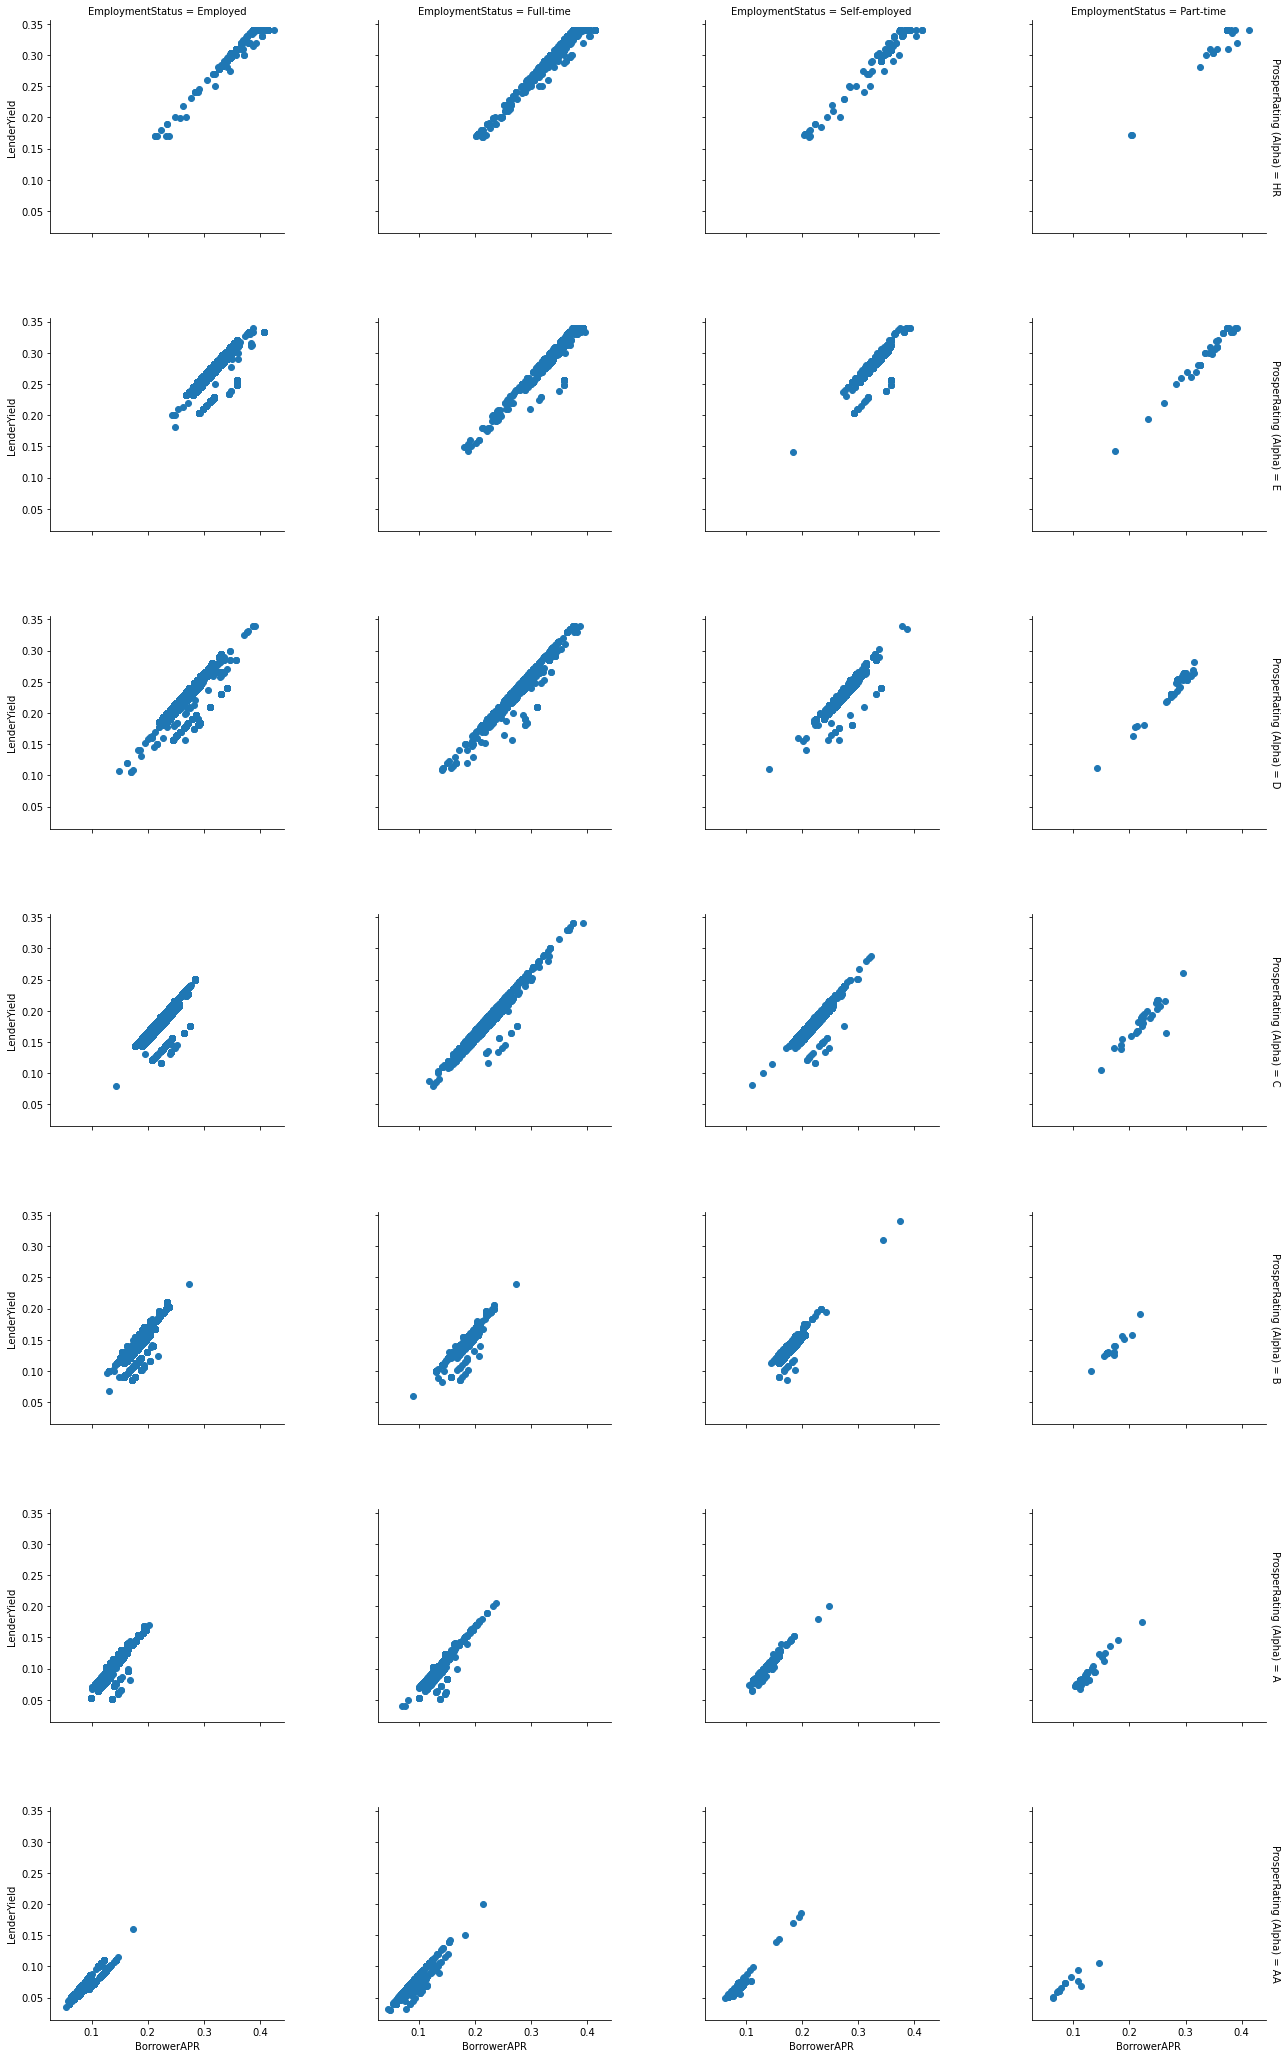

In [298]:
col_order = ['Employed', 'Full-time', 'Self-employed', 'Part-time']
#row_order = ['row_value_1', 'row_value_2', 'row_value_3']
g = sb.FacetGrid(data = clean_loans, col = 'EmploymentStatus', row = 'ProsperRating (Alpha)', height = 4.5,
                 col_order=col_order, margin_titles = True)
g.map(plt.scatter, 'BorrowerAPR', 'LenderYield');

# Adjust spacing between the plots
plt.subplots_adjust(top=0.9, wspace=0.4, hspace=0.4)

# Display the plot
plt.show()

#### Lenders' Yield Vrs Home Ownership and Loan Ratings

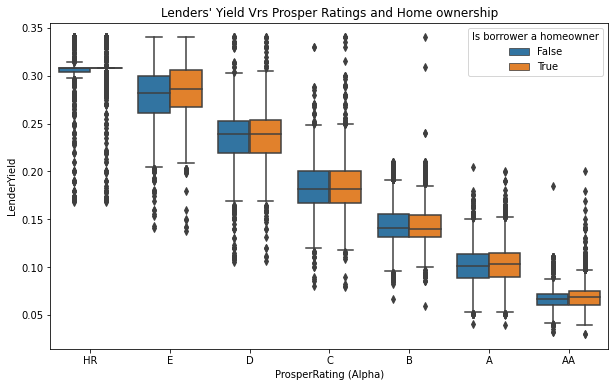

In [299]:
plt.figure(figsize=[10,6])
ax = sb.boxplot(data = clean_loans, x = 'ProsperRating (Alpha)', y = 'LenderYield', hue = 'IsBorrowerHomeowner')
ax.legend(title = 'Is borrower a homeowner')
ax.set_title("Lenders' Yield Vrs Prosper Ratings and Home ownership");


#### Lenders' Yield Vrs Borrowers' rate, Loan Status and Home Ownership

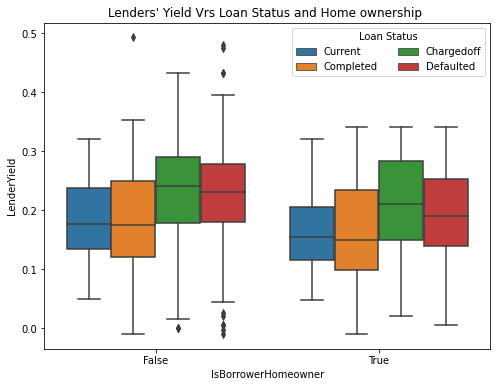

In [300]:
# Define the order of the hue levels
hue_order = ['Current', 'Completed', 'Chargedoff', 'Defaulted']
plt.figure(figsize=(8, 6))
# Create the box plot
ax = sb.boxplot(data=clean_loans, x='IsBorrowerHomeowner', y='LenderYield', hue='LoanStatus', hue_order=hue_order)

# Limit the number of columns in the legend
ax.legend(title='Loan Status', ncol=2)
ax.set_title("Lenders' Yield Vrs Loan Status and Home ownership ")
# Show the plot
plt.show()

***Observations***
<br>
Among the categorical variables - loan satus, employment status, home ownership and ratings, the ratings show a significant trends with the most important variable under investigation, that is the lenders' yield. 
Noticeably, the ratings (which are ordered) show that high ratings have low lenders's yield while low ratings indicate high returns to investors. 

### Conclusions

We explore the distribution of the most important attributes and determined the numeric variables that correlate fairly with the target variable. The focus was to determine the impact of these variables on the yield or returns to loan investors.
<br>
We realised that the annual percentage rate and estimated loss are the most important predictors of the yield to investors. These two have strong relationship with investors yield. 
<br>
Among the categorial variables investigated, the ratings show a very significant trend. Highly rated loans turn to have low yield while the low rated ones yield high returns.